# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [23]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12., 7.)})
sns.set_style('whitegrid')

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:>

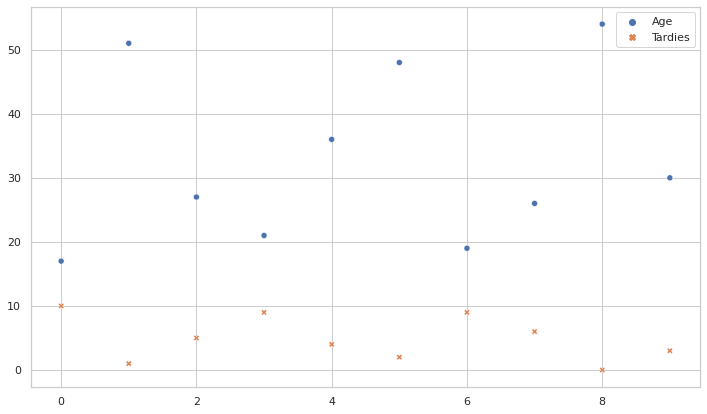

In [24]:
sns.scatterplot(data = student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Se puede ver como hay una relación directa entre las veces que se llega tarde y la edad. Podemos ver como los puntos azules y los amarillos hacen espejo en el eje x con la singularidad de que los puntos azules se alejan mucho más del eje del 'espejo'. pero el patrón es perfectamente reconocible. A menor edad más veces se llega tarde. Creo que hasta podría ser una correlación de uno.

In [13]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
Me imagino que en este caso es negatico porque es inversamente proporcional, edad y veces que se llega tarde.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


La coovarianza expresa como varían dos datos del dataset el uno con respecto del otro en relación a la media. Al ser negativa entre 'Age' y 'Tardies' sabemos que su relación es inversa cuanto más disminuye un dato, más alto es el otro y viceversa. No podemos determinar en qué medida variaran mirando la coovarianza, pero si mirando la correlación, y al ser -0.93 aproximadamente sabemos que 'Age' y 'Tardies' varían casi exactamente igual en valores relativos y al ser negativo, de nuevo, de manera inversa. Si 'Age' toma un valor pequeño, 'Tardies' tomará un valor alto y esto ocurrirá siempre con una precisión de 0.939163

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(

    X = student_data[['Age']],
    y = student_data.Tardies
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

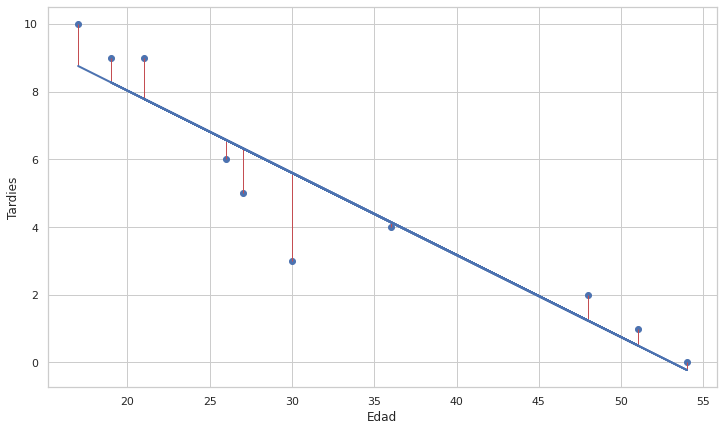

In [104]:
y_hat = beta_0 + beta_1 * student_data.Age
plt.scatter(student_data.Age,student_data.Tardies)
plt.plot(student_data.Age, y_hat, lw=2)
plt.vlines(student_data.Age, y_hat, student_data.Tardies, lw = 1, color = 'r')
plt.xlabel('Edad')
plt.ylabel('Tardies')
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Creo que hay una persona de 43 años haciéndose pasar por un treintañero.

Se puede ver como los valores originales se ajustan y se adecúan bastante bien a la regresión lineal, distancia esceptuando en un caso es casi siempre con fallo de un punto o menor, así que la probabilidad de predecir el número de veces que llegará tarde una persona atendiendo a su edad es bastante alto y con un error bastante pequeño.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [66]:
coches = pd.read_csv('vehicles.csv', index_col = 0)
coches.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [69]:
coches = coches[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [70]:
coches.columns = nombres

In [162]:
nombres = ['year', 'cilindros', 'barrels_year', 'combined_MPG', 'cost_year', 'emisiones']

In [163]:
coches.columns = nombres

In [164]:
coches.head()

,year,cilindros,barrels_year,combined_MPG,cost_year,emisiones
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [165]:
coches.corr()

,year,cilindros,barrels_year,combined_MPG,cost_year,emisiones
year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
cilindros,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
barrels_year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
cost_year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
emisiones,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [166]:
coches.emisiones.median()

467.7368421052632

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [167]:
lr_c = LinearRegression()

In [193]:
lr_c.fit(

    X = coches[['year', 'cilindros', 'barrels_year', 'combined_MPG', 'cost_year']],
    y = coches.emisiones
)
beta_c1 = lr_c.coef_
beta_c0 = lr_c.intercept_

In [194]:
beta_c0

769.8882836465637

In [195]:
beta_c1

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [178]:
barriles_cero = [coches['barrels_year'] == 0]
print(coches['barrels_year'].mean())
print(coches['barrels_year'].median())

17.609055502328133
17.347894736842107


<function matplotlib.pyplot.show(close=None, block=None)>

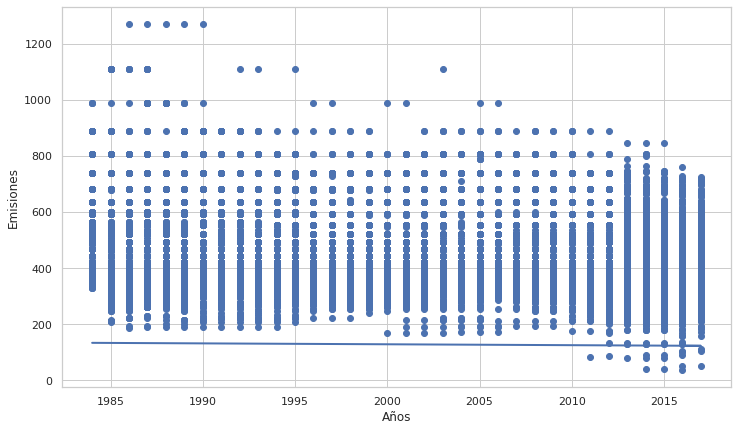

In [170]:
y_hat_c = beta_c0 + beta_c1[0] * coches['year']
plt.scatter(coches['year'], coches.emisiones)
plt.plot(coches['year'], y_hat_c, lw=2)
plt.xlabel('Años')
plt.ylabel('Emisiones')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

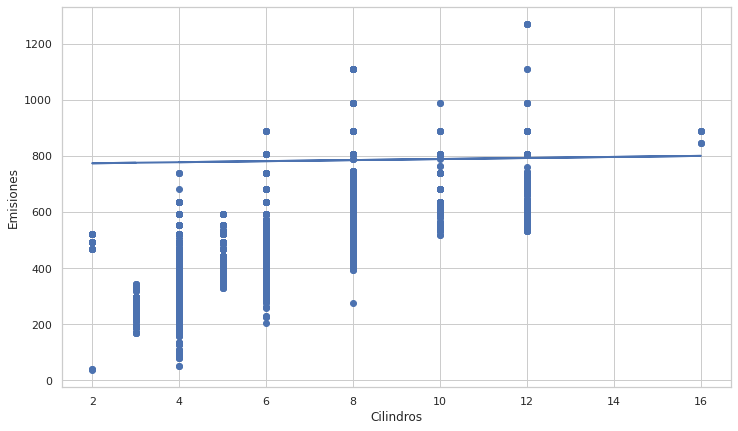

In [171]:
y_hat_c = beta_c0 + beta_c1[1] * coches['cilindros']
plt.scatter(coches['cilindros'], coches.emisiones)
plt.plot(coches['cilindros'], y_hat_c, lw=2)
plt.xlabel('Cilindros')
plt.ylabel('Emisiones')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

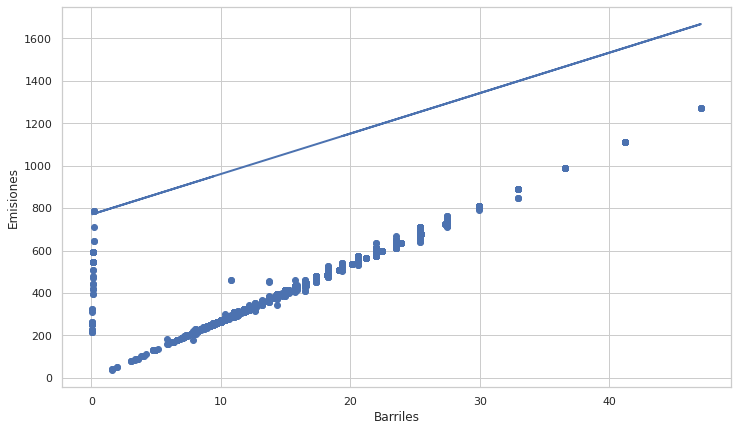

In [172]:
y_hat_c = beta_c0 + beta_c1[2] * coches['barrels_year']
plt.scatter(coches['barrels_year'], coches.emisiones)
plt.plot(coches['barrels_year'], y_hat_c, lw=2)
plt.xlabel('Barriles')
plt.ylabel('Emisiones')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

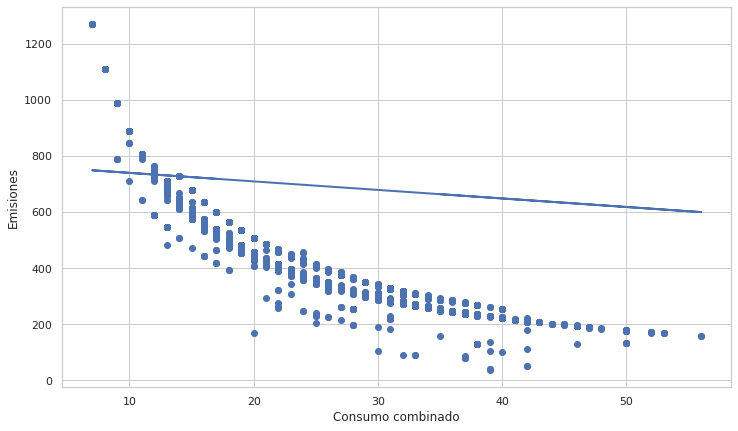

In [173]:
y_hat_c = beta_c0 + beta_c1[3] * coches.combined_MPG
plt.scatter(coches.combined_MPG, coches.emisiones)
plt.plot(coches.combined_MPG, y_hat_c, lw=2)
plt.xlabel('Consumo combinado')
plt.ylabel('Emisiones')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

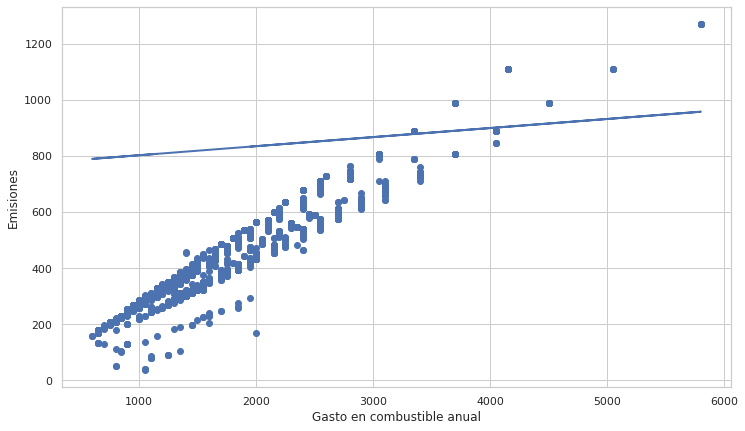

In [174]:
y_hat_c = beta_c0 + beta_c1[4] * coches['cost_year']
plt.scatter(coches['cost_year'], coches.emisiones)
plt.plot(coches['cost_year'], y_hat_c, lw=2)
plt.xlabel('Gasto en combustible anual')
plt.ylabel('Emisiones')
plt.show

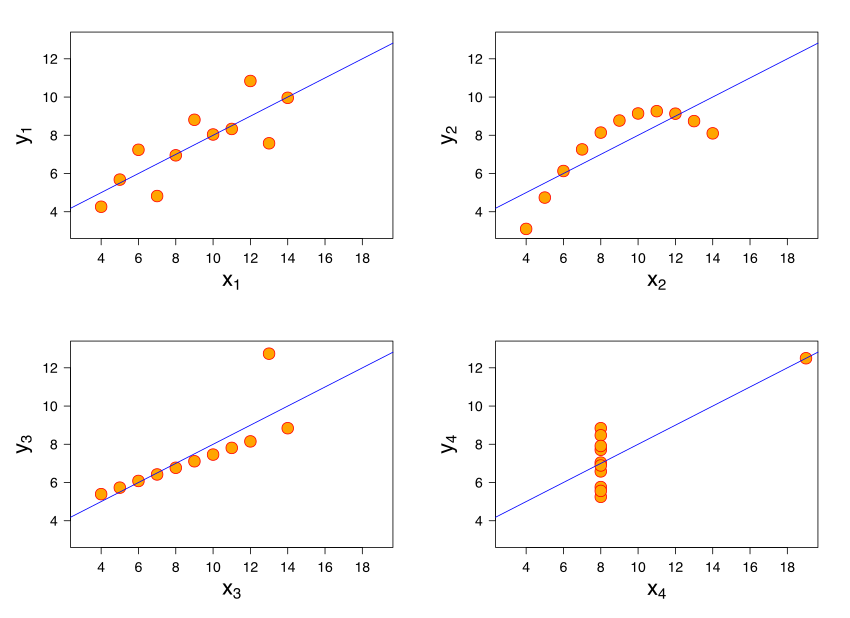

🤔🤔🤔🤔🤔🤔🤔🤔🤔

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [175]:
sumario_coches = smf.ols('emisiones ~ year + cilindros + barrels_year + combined_MPG + cost_year', data = coches).fit()
sumario_coches.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              emisiones   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:36:54   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      769.8883     19.392     39.702      0.000     731.880     807.897
year            -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cilindros        1.8788      0.083     22.598      0.000       1.716       2.042
barrels_year    19.0529      0.061    311.600      0.000      18.933      19.173
combined_MPG    -3.0404      0.042    -71.645      0.000      -3.124      -2.957
cost_year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A la vista de los plots anteriores y dándonos cuenta de que el fit se encuentra completamente deformado, por mucho que los datos del summary sean prácticamente perfectos, sólo trabajaría con la variable coste de combustible anual 'cost_year' que como puede verse en el plot siguiente si que nos daría un factor de acierto bueno y un fallo creo que no demasiado alto

In [199]:
lr_c2 = LinearRegression()

In [200]:
lr_c2.fit(

    X = coches[['cost_year']],
    y = coches.emisiones
)
beta_c12 = lr_c2.coef_
beta_c02 = lr_c2.intercept_

In [205]:
beta_c12[0]

0.21861650771614183

In [206]:
beta_c02

61.56307241316688

<function matplotlib.pyplot.show(close=None, block=None)>

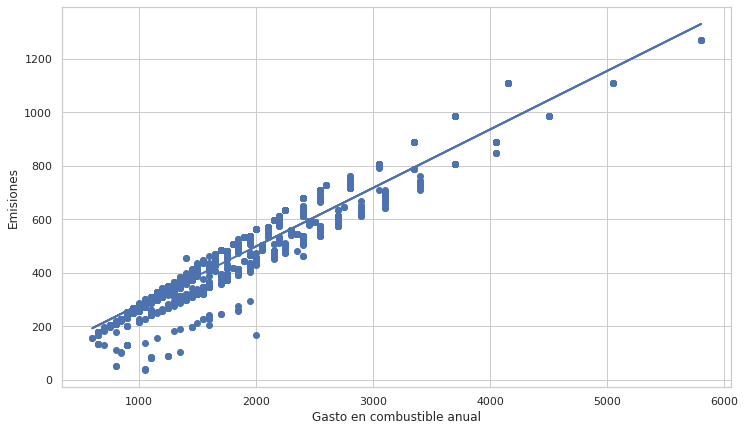

In [208]:
y_hat_c = beta_c02 + beta_c12[0] * coches['cost_year']
plt.scatter(coches['cost_year'], coches.emisiones)
plt.plot(coches['cost_year'], y_hat_c, lw=2)
plt.xlabel('Gasto en combustible anual')
plt.ylabel('Emisiones')
plt.show

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [241]:
x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13]

fiesta = pd.DataFrame({'invitados' : x, 'asistentes' : y})
fiesta

,invitados,asistentes
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [216]:
fiesta.corr()

,invitados,asistentes
invitados,1.00000,0.96523
asistentes,0.96523,1.00000


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:>

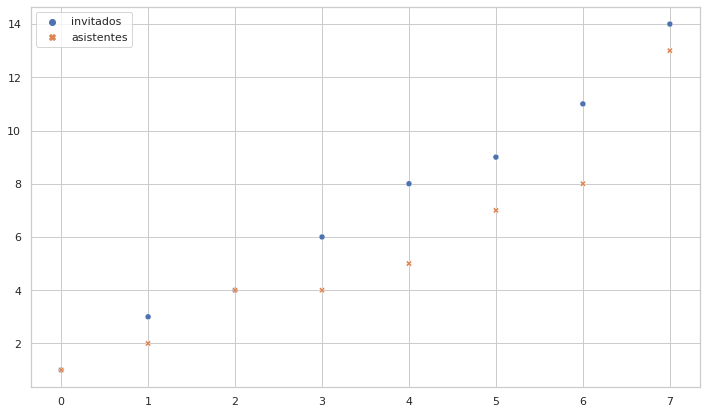

In [215]:
sns.scatterplot(data = fiesta)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Yo veo una linealidad bastante evidente y la relación entre ambas variables está muy correlacionada. Como mucho me puedo plantear como outliers los valores 8 y 11 en invitados, pero me parece excesivo definirlos como datos 'problemáticos'

In [220]:
lr_c3 = LinearRegression()

In [222]:
lr_c3.fit(

    X = fiesta[['invitados']],
    y = fiesta.asistentes
)
beta_c13 = lr_c3.coef_
beta_c03 = lr_c3.intercept_

<function matplotlib.pyplot.show(close=None, block=None)>

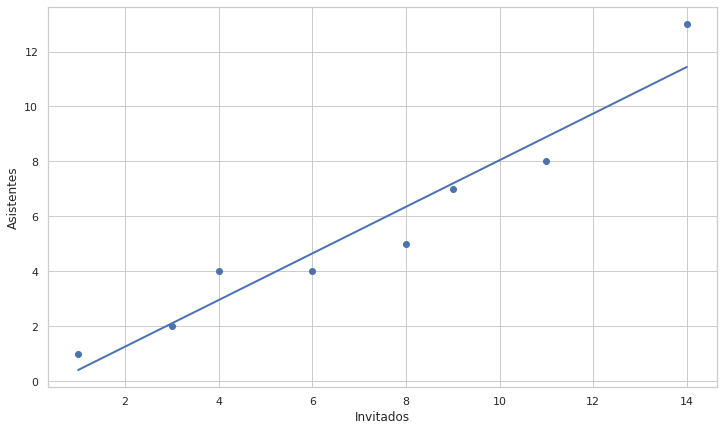

In [223]:
y_hat_c = beta_c03 + beta_c13[0] * fiesta['invitados']
plt.scatter(fiesta['invitados'], fiesta.asistentes)
plt.plot(fiesta['invitados'], y_hat_c, lw=2)
plt.xlabel('Invitados')
plt.ylabel('Asistentes')
plt.show

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [242]:
fiesta = fiesta.drop([4, 6],axis=0)

In [243]:
fiesta

,invitados,asistentes
0,1,1
1,3,2
2,4,4
3,6,4
5,9,7
7,14,13


In [244]:
lr_c4 = LinearRegression()

In [245]:
lr_c4.fit(

    X = fiesta[['invitados']],
    y = fiesta.asistentes
)
beta_c14 = lr_c4.coef_
beta_c04 = lr_c4.intercept_

<function matplotlib.pyplot.show(close=None, block=None)>

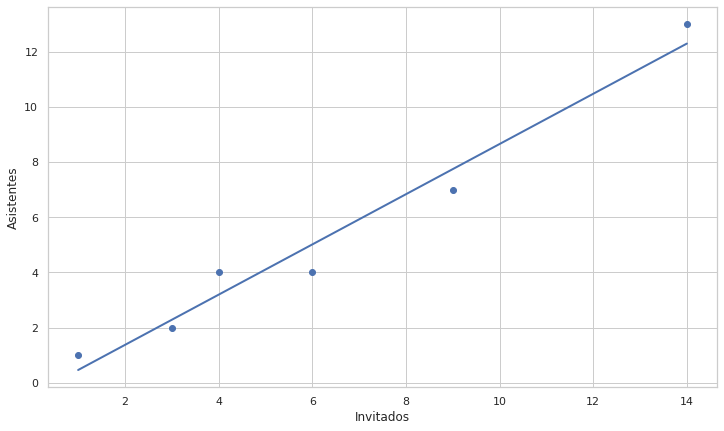

In [246]:
y_hat_c = beta_c04 + beta_c14[0] * fiesta['invitados']
plt.scatter(fiesta['invitados'], fiesta.asistentes)
plt.plot(fiesta['invitados'], y_hat_c, lw=2)
plt.xlabel('Invitados')
plt.ylabel('Asistentes')
plt.show

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Quitando estos dos valores la recta se ajusta mejor y no hay ningún valor que tenga un error superior a uno.